# TF 2 Clothing
https://www.tensorflow.org/tutorials/keras/classification

In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2023-09-13 10:09:49.502426: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.13.0


This guide uses the Fashion MNIST dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here
https://github.com/zalandoresearch/fashion-mnist


In [27]:
fashion_ds = tf.keras.datasets.fashion_mnist

# 10 categories - classification problem
# 28 x 28 px so 56 px in grayscale 0-255
(x_train, y_train), (x_test, y_test) = fashion_ds.load_data()

x_train, x_test = x_train/255, x_test/255 # normalize values from 0-1, from 0-255 ,smaller range faster more accurate

input_shape = x_train[1].shape # gives (28, 28)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] # categories from ds

(28, 28)
(60000,)
(10000, 28, 28)
(10000,)


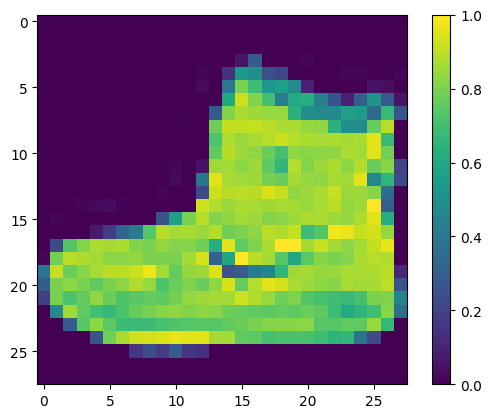

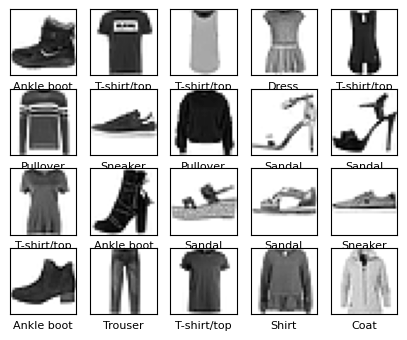

In [21]:
print(x_train[1].shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

plt.figure(figsize=(5,5))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]], fontsize=8)
plt.show()

In [55]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=input_shape), # 28x28 goes to 1x784
    tf.keras.layers.Dense(128, activation="relu"),
    # tf.keras.layers.Dense(256, activation="relu"),
    # tf.keras.layers.Dense(512, activation="relu"),
    # ?? WHY: 128 the input is 28x28=784 with 256 grayscale
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(class_names))
])

In [56]:
model.compile(
    optimizer="adam",
    # Adaptive Movement Estimation. Combines AdaGrad (Adaptive Gradient Algo) with RMSProp (Root Mean Square Propagation)
    # per-parameter learning rate
    # gradient based on average of past gradients (squared + average); used for bias  correction. 
    # learning rate is customized to each parameter, which can lead to faster convergence.
    # works well for complex/large number of parameters
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # algo to measure accuracy of model during training
    # cross entropy measures the difference between two probability distributions. 
    # categorical c e applies the c e to a multi-dim classification problem. ie. output must add up to 100% within the classfication group.
    metrics=['accuracy'] # used to monitor the training/testing steps. 

    # from_logits = True means the input encodes a probability distribution
)

In [57]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5411 - accuracy: 0.8095
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4007 - accuracy: 0.8558
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3681 - accuracy: 0.8666
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3475 - accuracy: 0.8737
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3300 - accuracy: 0.8776
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3218 - accuracy: 0.8817
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3083 - accuracy: 0.8848
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2988 - accuracy: 0.8892
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2932 - accuracy: 0.8901
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - loss: 

In [63]:
# model fit @ 10 epoch gives 89% accuracy; eval on test data gives less; this may be due to overfitting on the training data:
# https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting
# "To find an appropriate model size, it's best to start with relatively few layers and parameters, then begin increasing 
#   the size of the layers or adding new layers until you see diminishing returns on the validation loss."
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 0s 1ms/step - loss: 0.3541 - accuracy: 0.8743


In [64]:
prob_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [68]:
predictions = prob_model.predict(x_test)
print(predictions[0])
print(y_test[0])
np.argmax(predictions[0])

313/313 [==============================] - 0s 1ms/step
[4.2619877e-08 2.9811806e-12 1.5511183e-12 2.2143942e-12 3.6813247e-11
 1.7778077e-03 1.8886566e-09 2.1209855e-02 2.3222729e-08 9.7701228e-01]
9


9

In [69]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

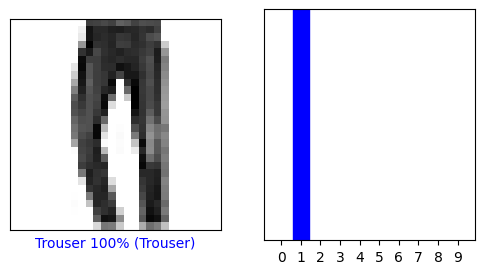

In [76]:
i = 5

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

In [90]:
import random
i = random.randrange(len(x_test))
img = np.expand_dims(x_test[i], 0)
pred = prob_model.predict(img)
print(i)
print(class_names[np.argmax(pred)])
print(class_names[y_test[i]])

1/1 [==============================] - 0s 25ms/step
1202
Trouser
Trouser


In [ ]:
# MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.